# Forecasts Historical Product Demand
---
##### UAS STATISTIKA Ilmu Komputer 3B
- Jihan Nurul Azizah        (1955201055)

---
##### Source Dan Dependency 
- Train data dan Predict data menggunakan library dari Facebook Prophet (https://facebook.github.io/prophet/)
- Data yang digunakan Historical Product Demand



### Install Dan Import Dependency

In [ ]:
%pip install prophet pystan

In [1]:
import pandas as pd # import pandas
from prophet import Prophet # import prophet
import matplotlib.pyplot as plt # import matplotlib

C:\Users\Olionnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Membaca dan Memproses Tahun Dari Data

In [56]:
df = pd.read_csv('Historical_Product_Demand.csv') # membaca data
df.head() # melihat 5 data teratas

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,7/27/2012,100
1,Product_0979,Whse_J,Category_028,1/19/2012,500
2,Product_0979,Whse_J,Category_028,2/3/2012,500
3,Product_0979,Whse_J,Category_028,2/9/2012,500
4,Product_0979,Whse_J,Category_028,3/2/2012,500


In [57]:
df.describe() # melihat deskripsi data

,Order_Demand
count,1.048575e+06
mean,4.867427e+03
std,2.893346e+04
min,-9.990000e+05
25%,1.800000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [58]:
# Semua Kolom Data
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [59]:
# Menghapus Kolom Tidak Penting
df = df.drop(['Product_Code', 'Warehouse', 'Product_Category'], axis=1)
df.head()

,Date,Order_Demand
0,7/27/2012,100
1,1/19/2012,500
2,2/3/2012,500
3,2/9/2012,500
4,3/2/2012,500


In [60]:
# Mengubah tipe data kolom ds menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Order_Demand
0,2012-07-27,100
1,2012-01-19,500
2,2012-02-03,500
3,2012-02-09,500
4,2012-03-02,500


In [61]:
# Mengubah tipe data kolom y menjadi float
df['Order_Demand'] = df['Order_Demand'].astype(float)
df.head()

,Date,Order_Demand
0,2012-07-27,100.0
1,2012-01-19,500.0
2,2012-02-03,500.0
3,2012-02-09,500.0
4,2012-03-02,500.0


<Axes: xlabel='Date'>

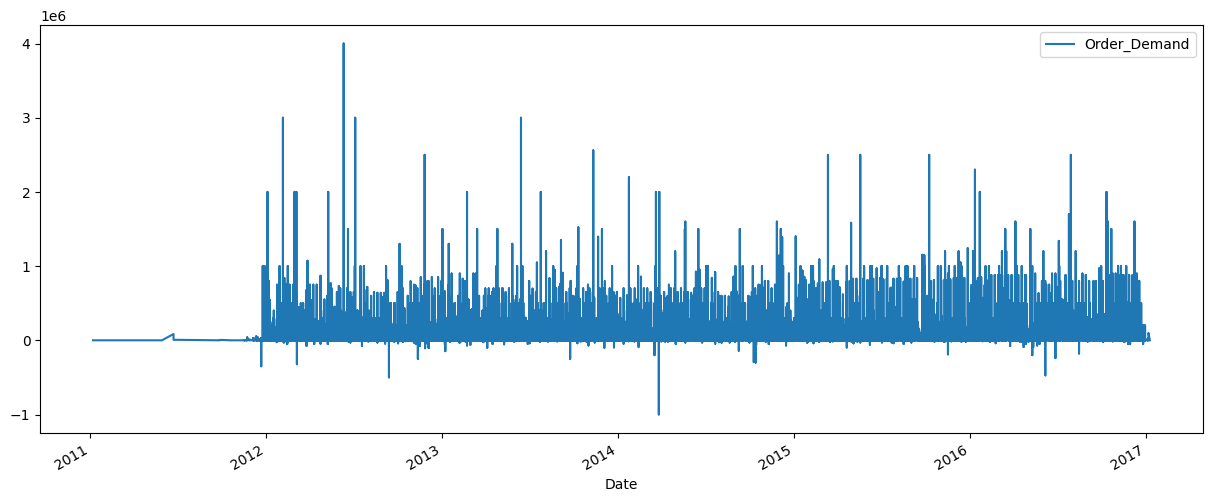

In [62]:
# Menampilkan grafik data
df.plot(x='Date', y='Order_Demand', figsize=(15, 6))



# Mempelajari model data

In [69]:

# Mengubah nama kolom menjadi ds dan y
df = df.rename(columns={'Date': 'ds', 'Order_Demand': 'y'})
df.head()



,ds,y
0,2012-07-27,100.0
1,2012-01-19,500.0
2,2012-02-03,500.0
3,2012-02-09,500.0
4,2012-03-02,500.0


In [73]:
# Train Model
model = Prophet()
model.fit(df)


09:39:59 - cmdstanpy - INFO - Chain [1] start processing
09:41:00 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
# forecasting untuk 8 tahun kedepan
future = model.make_future_dataframe(periods=8 , freq='Y')
forecast = model.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-08,5034.680000,-34572.162071,41114.258800,5034.680000,5034.680000,-1002.130005,-1002.130005,-1002.130005,-1901.018239,-1901.018239,-1901.018239,898.888234,898.888234,898.888234,0.0,0.0,0.0,4032.549995
1,2011-05-31,5071.668551,-31974.497422,41271.350917,5071.668551,5071.668551,-349.841819,-349.841819,-349.841819,-190.908972,-190.908972,-190.908972,-158.932848,-158.932848,-158.932848,0.0,0.0,0.0,4721.826731
2,2011-06-24,5077.876420,-31543.446917,38663.782332,5077.876420,5077.876420,-412.481681,-412.481681,-412.481681,-508.166915,-508.166915,-508.166915,95.685234,95.685234,95.685234,0.0,0.0,0.0,4665.394738
3,2011-09-02,5095.982703,-31976.101462,42516.269605,5095.982703,5095.982703,-550.181073,-550.181073,-550.181073,-508.166915,-508.166915,-508.166915,-42.014158,-42.014158,-42.014158,0.0,0.0,0.0,4545.801630
4,2011-09-27,5102.449233,-31894.812350,44531.189968,5102.449233,5102.449233,-676.064717,-676.064717,-676.064717,-190.908972,-190.908972,-190.908972,-485.155745,-485.155745,-485.155745,0.0,0.0,0.0,4426.384516


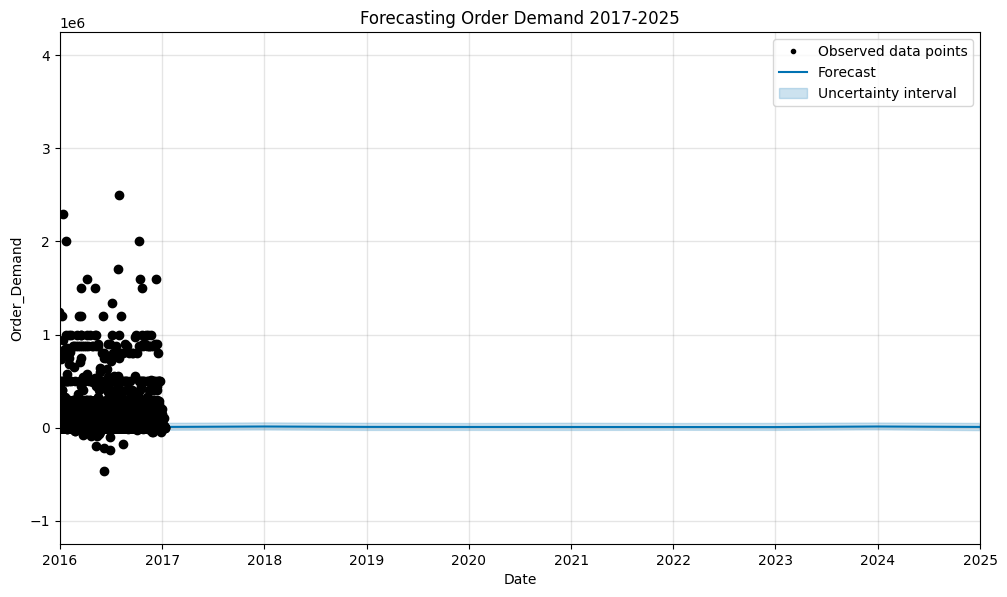

In [90]:
from datetime import datetime
# Visualisasi Data Forecasting tahun 2017-2025

start_date = datetime.strptime('2016-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2025-01-01', '%Y-%m-%d')

model.plot(forecast, xlabel='Date', ylabel='Order_Demand', include_legend=True)
plt.xlim(start_date, end_date)
plt.title('Forecasting Order Demand 2017-2025')
plt.show()

    
    


C:\Users\Olionnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Olionnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Olionnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra

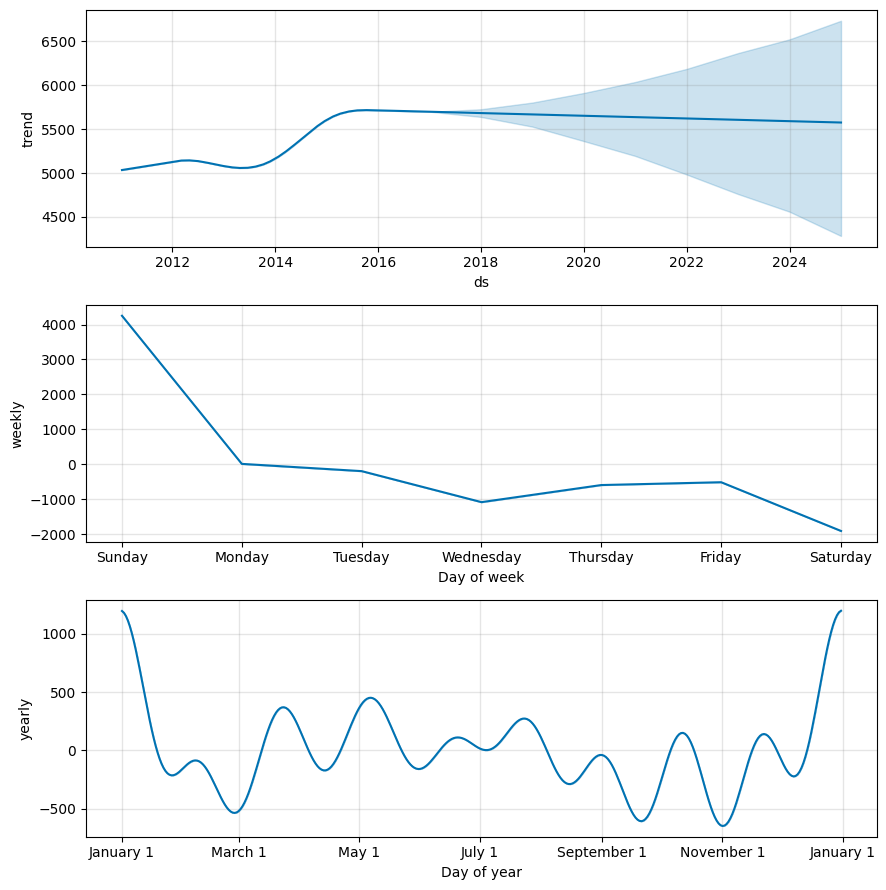

In [91]:
# Visualisasi Detail Data Forecasting
if model is not None:
    model.plot_components(forecast)
    plt.show()